# Import Staments

<b>Main objective is to understand the customer based on characteristics like sex, marital status, age, education etc. At this point we are not looking at the shopping behavior. Our main focus is to form segments or clusters based on the above mentioned traits.<br><br>
Individuals with similar traits in the same cluster are expected to have similar choice patterns, which will further help us form strategies to target them 


In [55]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage
import matplotlib. pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle



# Data Load

In [2]:
demo_df =pd.read_csv(r"C:\Users\sidha\Desktop\proj\segmentation_data.csv",index_col=0)
demo_df.head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
100000006,0,0,35,1,144848,0,0
100000007,0,0,53,1,156495,1,1
100000008,0,0,35,1,193621,2,1
100000009,0,1,61,2,151591,0,0


# Exploring Data

In [3]:
#Looking at statistics
demo_df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


<b>Note</b> - Data pertaining to customers who own loyalty cards

<b>Age </b>- Age is between 18 years and 76 years, with mean age being 36 years approximately and median age being 33 years. Based on the values of mean and median, it seems like the variable age is positively skewed<br>
<b>Income </b>- Income ranges between 35832 and 309364, the average value is 120954, with a median value of 115548.<br>
<b>Sex </b>- 45.7% percent shoppers are females<br>
<b>Education</b> - Based on the mean value of education, it seems like majority of shoppers have high school as max level of education<br>
<b>Occupation</b> - Based on the mean value of occupation, it seem like majority of shoppers are skilled employees/officials<br>
<b>Settlement size</b> - Based on the mean value of this variable, it seems like most of the shoppers belong to mid size cities<br> 

<AxesSubplot:>

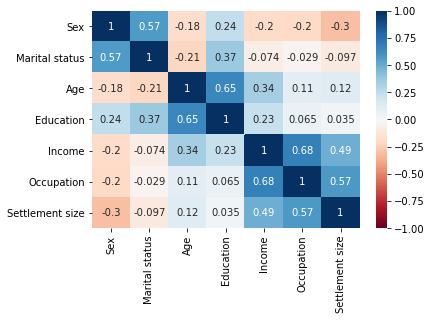

In [4]:
#Looking at correlations
sns.heatmap(demo_df.corr(), vmin=-1, vmax=1, annot=True,cmap='RdBu')

<b>Notable correlations<br></b>
Education and Age - 0.65<br>
Occupation and Income - 0.68<br>
Settlement size and occupation - 0.57<br>
Income and Settlement size - 0.49
 


# Preprocessing Data(Standardization)

<b>Scaling the data to avoid overcomponsating for different scales and units of measurements. Bring everything on the same scale

In [5]:
scaler=StandardScaler()
demo_std=scaler.fit_transform(demo_df)

# Hierarchical Clustering

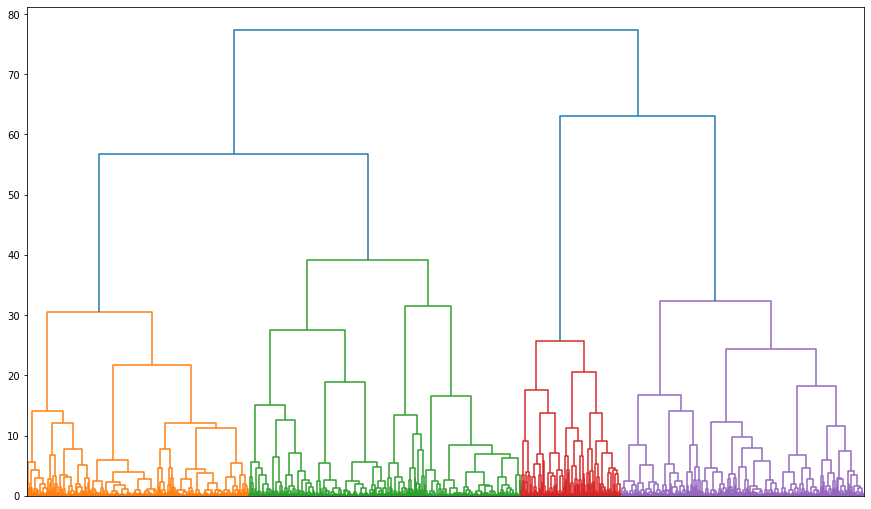

In [6]:
plt.figure(figsize=(15,9))
hier_cluster=linkage(demo_std, method='ward')
dendrogram(hier_cluster,show_leaf_counts=False,no_labels=True)
plt.show()

We are not going to use hierarchical clustering, based on the nature of the data. We created to dendogram to get a rough estimate on the number of clusters to be formed

# K mean clustering

In [7]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(demo_std)
    wcss.append(kmeans.inertia_)
    

<b>Based on the estimate obtained above, we check the value of WCSS(Within cluster sum of squared distances) in a range surrounding the estimate.

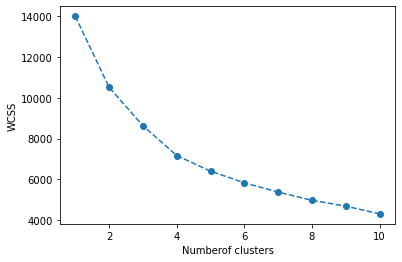

In [8]:
plt.plot(range(1,11),wcss,marker='o',linestyle="--")
plt.xlabel('Numberof clusters')
plt.ylabel('WCSS')
plt.show()

<b>The value of WCSS are in harmony with the results of the dendrogram, therfore we choose a cluster size of 4

In [9]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans.fit(demo_std)

KMeans(n_clusters=4, random_state=42)

In [10]:
demo_df_k=demo_df.copy()
demo_df_k['segment']=kmeans.labels_


In [11]:
demo_df_k.head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,3
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,2
100000006,0,0,35,1,144848,0,0,1
100000007,0,0,53,1,156495,1,1,2
100000008,0,0,35,1,193621,2,1,2
100000009,0,1,61,2,151591,0,0,0


In [12]:
demo_df_grouped=demo_df_k.groupby(['segment'])

# Inspecting clusters based on groups formed by K means algorithm

In [13]:
demo_df_grouped.count()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
segment,,,,,,,
0,263,263,263,263,263,263,263
1,462,462,462,462,462,462,462
2,570,570,570,570,570,570,570
3,705,705,705,705,705,705,705


<b>Cluster 0</b> turned out to be the smallest cluster, with a cluster size of 263 data points out of 2000 data points.<br>
<b>Cluster 3</b> turned out to be the biggest cluster, with a cluster size of 705 data points out of 2000 data points


In [14]:
demo_df_grouped.mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
segment,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


<b>Notable inferences</b><br><br>
<b>Sex:</b><br> Only 2.98% of the data points in cluster 2, belong to females<br>
85.39% of data points in cluster 3 belong to females<br>
Segment 0 has a 50-50 male to female ratio
<br>
<br>
<b>Marital Status:</b><br>
Segment 3 has 99.71% individuals who have been married at some point<br>
Segment 0 has 69.2% individuals who have been married at some point<br>
Segment 1 has just 2% individuals who have been married at some point<br>
Segment 2 has just 17.3% individuals who have been married at some point<br>
<br>
<br>
<b>Age:</b><br>
The average age of individuals in segment 0 is 55
The average age of individuals in segment 1 is 29
<br>
<br>
<b>Education</b><br>
Segment 0 tends to have people with higher educational status, as compared to any other group<br><br>
<b>Income</b><br>
The average income of individuals in segment 0 is the highest, closely followed by individuals in segment 2<br>
The average income of individuals in segment 1 is the least as compared to other groups, with segment 3 being marginally
better<br><br> 
<b>Occupation</b><br>
Segment 1 performs badly in terms of skilled workers, while segment 2 leads the way, cllosely followed by segment 0<br><br>
<b>Settlement size</b><br>
Segment 2 seems to be residing in mostly in mid and big size cities
Segment 1 seems to be residing mostly in small cities


# Customer profiling based on above inferences(Most Likely) 

<b>Segment 0</b> - An older married individual, with an university level or high school level education, with high income, most likely a skilled worker living in a mid sized city<br>
<b>Segment 1</b> - An unmarried midaged male, with lower income and skillset, living in a small city<br>
<b>Segment 2</b> - An unmarried midaged male, with high income and skillset, living in a big city<br>
<b>Segment 3</b> - A married female, in her late 20's, with high income, living in a small city 

<b>Looking at seperations, we see that although there seems to exist some kind of seperation, with respect to variables, it is not very distinct, i.e. there is a lot of overlap. This can be seen clearly in the scatter plot of age v/s income.

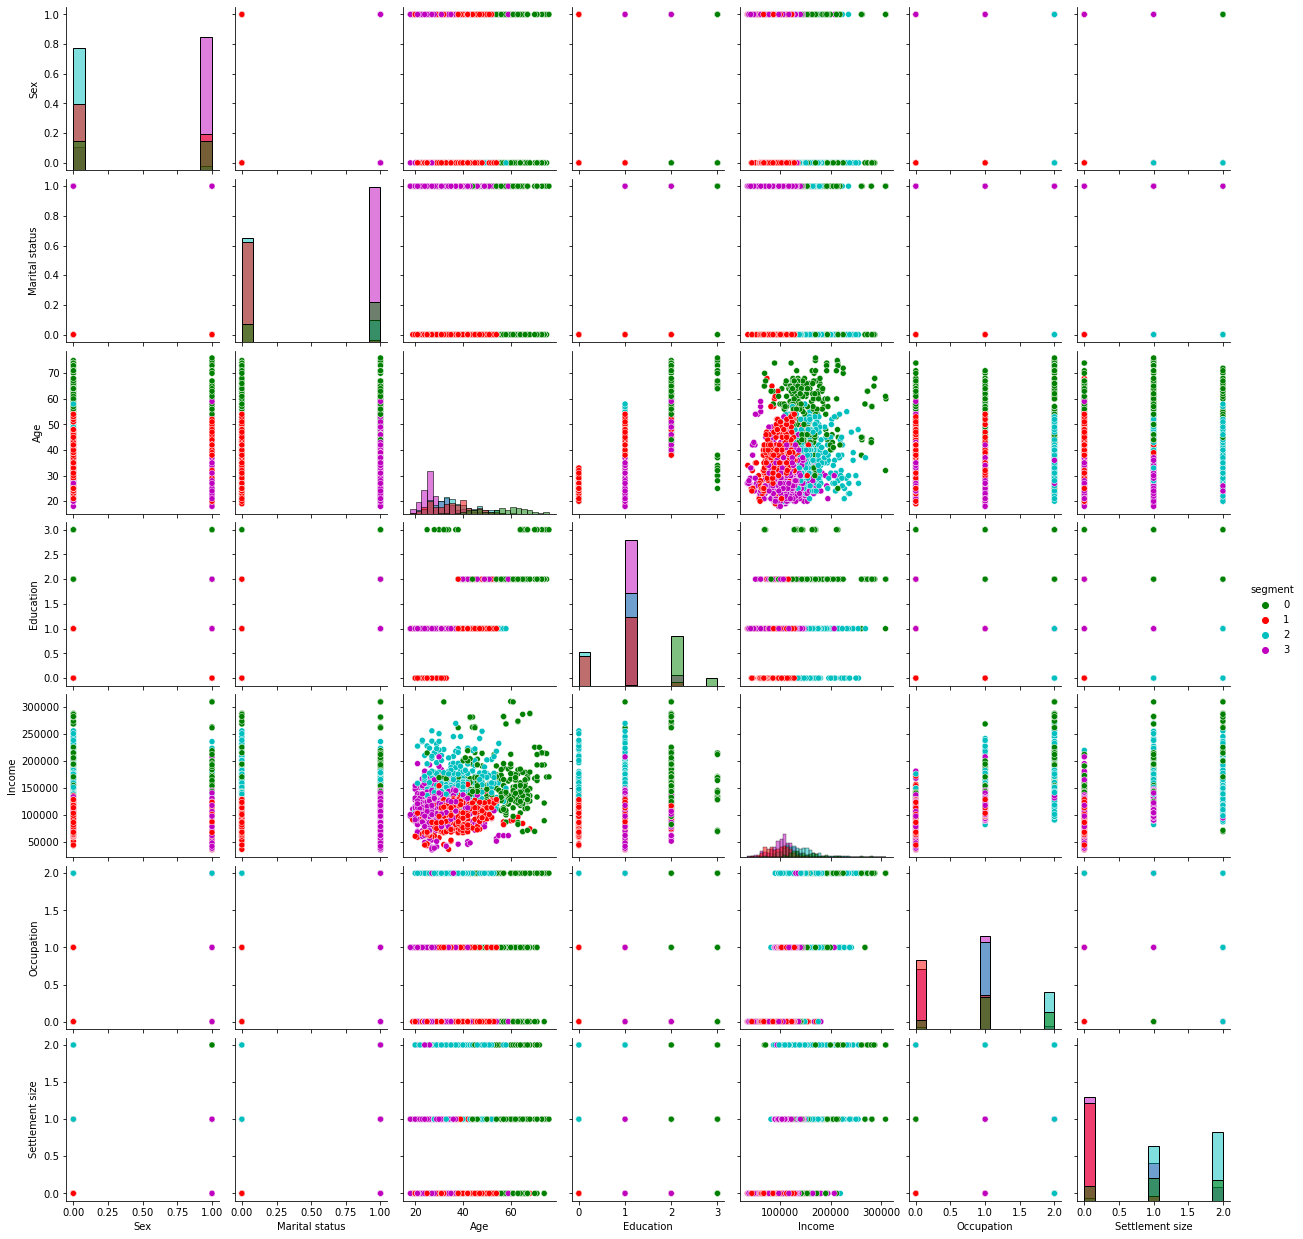

In [15]:
sns.pairplot(demo_df_k,hue="segment",diag_kind="hist",palette=['g','r','c','m'])
plt.show()

# PCA(Prinicpal Component Analysis)

<B>To solve the problem of overlapping, we will reduce the complexity of the dataset by reducing the dimensionality(number of attributes). We will be using PCA(prinicpal) component analysis to achieve this.

In [16]:
pca=PCA()
pca.fit(demo_std)

PCA()

<b>The array represents the variance explained by each of the newly formed principal components.

In [17]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Information captured')

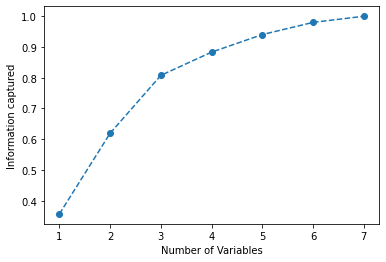

In [18]:
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.xlabel('Number of Variables')
plt.ylabel('Information captured')

<b> Based on the results we can see that, taking 4 principal components captures approximately 90% of the variance(information)

In [19]:
pca=PCA(n_components=3)
pca.fit(demo_std)

PCA(n_components=3)

In [20]:
pca.explained_variance_ratio_.cumsum()[-1]

0.8076836525675651

88.32% variance(information) captured by the 4 components

<b>Transforming 7 standardized variables, into 4 principal components

In [21]:
pca_scores=pca.transform(demo_std)
pca_scores

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

# Applying K means algorithm on principal components

In [22]:
wcss=[]
for i in range(1,11):
    kmeans_pca=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans_pca.fit(pca_scores)
    wcss.append(kmeans_pca.inertia_)

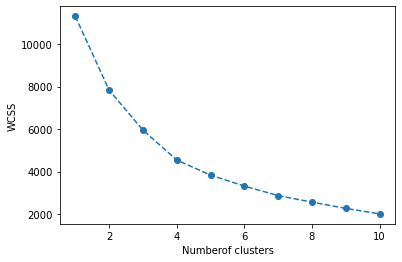

In [23]:
plt.plot(range(1,11),wcss,marker='o',linestyle="--")
plt.xlabel('Numberof clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
kmeans_pca=KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=4, random_state=42)

In [25]:
pca_scores_k=demo_df.copy()
pca_scores_k['component 0']=pca_scores[:,0]
pca_scores_k['component 1']=pca_scores[:,1]
pca_scores_k['component 2']=pca_scores[:,2]
#pca_scores_k['component 3']=pca_scores[:,3]
pca_scores_k['segment']=kmeans_pca.labels_


In [26]:
pca_scores_k.head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 0,component 1,component 2,segment
ID,,,,,,,,,,,
100000001,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
100000002,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
100000003,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0
100000004,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
100000005,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
100000006,0,0,35,1,144848,0,0,-0.274734,-0.871070,1.310152,0
100000007,0,0,53,1,156495,1,1,1.729504,-0.416069,1.212454,1
100000008,0,0,35,1,193621,2,1,2.510377,-0.751256,-0.504917,1
100000009,0,1,61,2,151591,0,0,0.419891,1.936115,2.209117,3


In [27]:
pca_scores_k_grouped=pca_scores_k.groupby(['segment'])
pca_scores_k_grouped.count()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 0,component 1,component 2
segment,,,,,,,,,,
0,459,459,459,459,459,459,459,459,459,459
1,585,585,585,585,585,585,585,585,585,585
2,693,693,693,693,693,693,693,693,693,693
3,263,263,263,263,263,263,263,263,263,263


In [28]:
pca_scores_k_grouped.mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 0,component 1,component 2
segment,,,,,,,,,,
0,0.307190,0.098039,35.383442,0.766885,93566.102397,0.248366,0.039216,-1.048838,-0.892116,1.010446
1,0.027350,0.167521,35.700855,0.731624,141489.721368,1.266667,1.475214,1.367167,-1.050209,-0.247981
2,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269
3,0.505703,0.688213,55.722433,2.129278,158391.676806,1.129278,1.110266,1.706153,2.031716,0.838839


<b>The values for component0, component1, component2 are not interpretable at this point. To understand them a better lets see how do they correlate with the actual columns of the demographic data<br><br>
<b>pca.components_ tells you the weights the actual columns of demographic data in each of the principal components

In [35]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [36]:
pca_components_df=pd.DataFrame(data=pca.components_,columns=demo_df.columns.values)
pca_components_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
1,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
2,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


<AxesSubplot:>

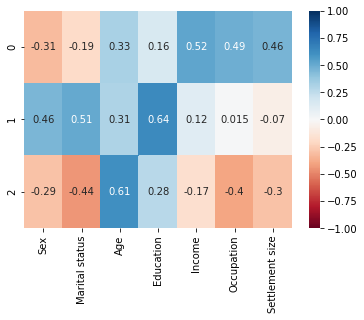

In [37]:
sns.heatmap(pca_components_df,vmin=-1, vmax=1, annot=True,cmap='RdBu')

<b>Component 0</b> is positively influenced by income, occupation and settlement size<br>
<b>Component 1</b> is positively influenced by the sex, education, marital status and age<br>
<b>Component 2</b> is positively influenced by age, but negatively influenced by marital status & occupation

Based on the above traits we can estimate that 
<br><b>Component 0</b>, is going to have a high value for career focused individuals
<br><b>Component 1</b>, is going to have a high value for individuals focused on education and lifestyle
<br><b>Component 2</b>, is going to have a high value for older people

<b>Based on this we can go back to our cluster results, and identify the personality of individuals in clusters

In [38]:
pca_scores_k_grouped.mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 0,component 1,component 2
segment,,,,,,,,,,
0,0.307190,0.098039,35.383442,0.766885,93566.102397,0.248366,0.039216,-1.048838,-0.892116,1.010446
1,0.027350,0.167521,35.700855,0.731624,141489.721368,1.266667,1.475214,1.367167,-1.050209,-0.247981
2,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269
3,0.505703,0.688213,55.722433,2.129278,158391.676806,1.129278,1.110266,1.706153,2.031716,0.838839


<b>If you look at individuals in cluster 3, we can see that on an average these individuals have a high positive weight for all the 3 components, which can indicate these individuals to be older and sucessful with high education and a corresponding high income, which could indicate them belonging to larger cities or settlement sizes. Over all they can be described as "well off"<br><br>
If you look at individuals, in cluster 0, we can see that on an average these individuals do not do good on component 0 and component 1, but good on component 2, this could indicate lower income, education, lifestyle, which could further infer they belong to settlements with less opportunities. Over all they can be described as "struggling"
<br><br>
If you look at individuals in cluster 1, we can see that on an average these individuals do good on component 0, but do not do so good on component 1 and component 2, these individuals are generally younger people with high income, are skilled and live in larger settlement sized. Over all these can be descibed as "Career Driven"
<br><br>
If you look at indivuals in cluster 2, we can see that on an average these individuals, do not do good on component 0 and component 2, but do good on component 1, this indicates younger individuals with good lifestyle and education, but not very high income. Over all these can be termed as "Standard" 

In [52]:
pca_scores_k_grouped.count()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component 0,component 1,component 2
segment,,,,,,,,,,
0,459,459,459,459,459,459,459,459,459,459
1,585,585,585,585,585,585,585,585,585,585
2,693,693,693,693,693,693,693,693,693,693
3,263,263,263,263,263,263,263,263,263,263


From the above table, we can infer that our largest segment is the cluster 2(standard) & our smalled segment is segment 3(welloffs)

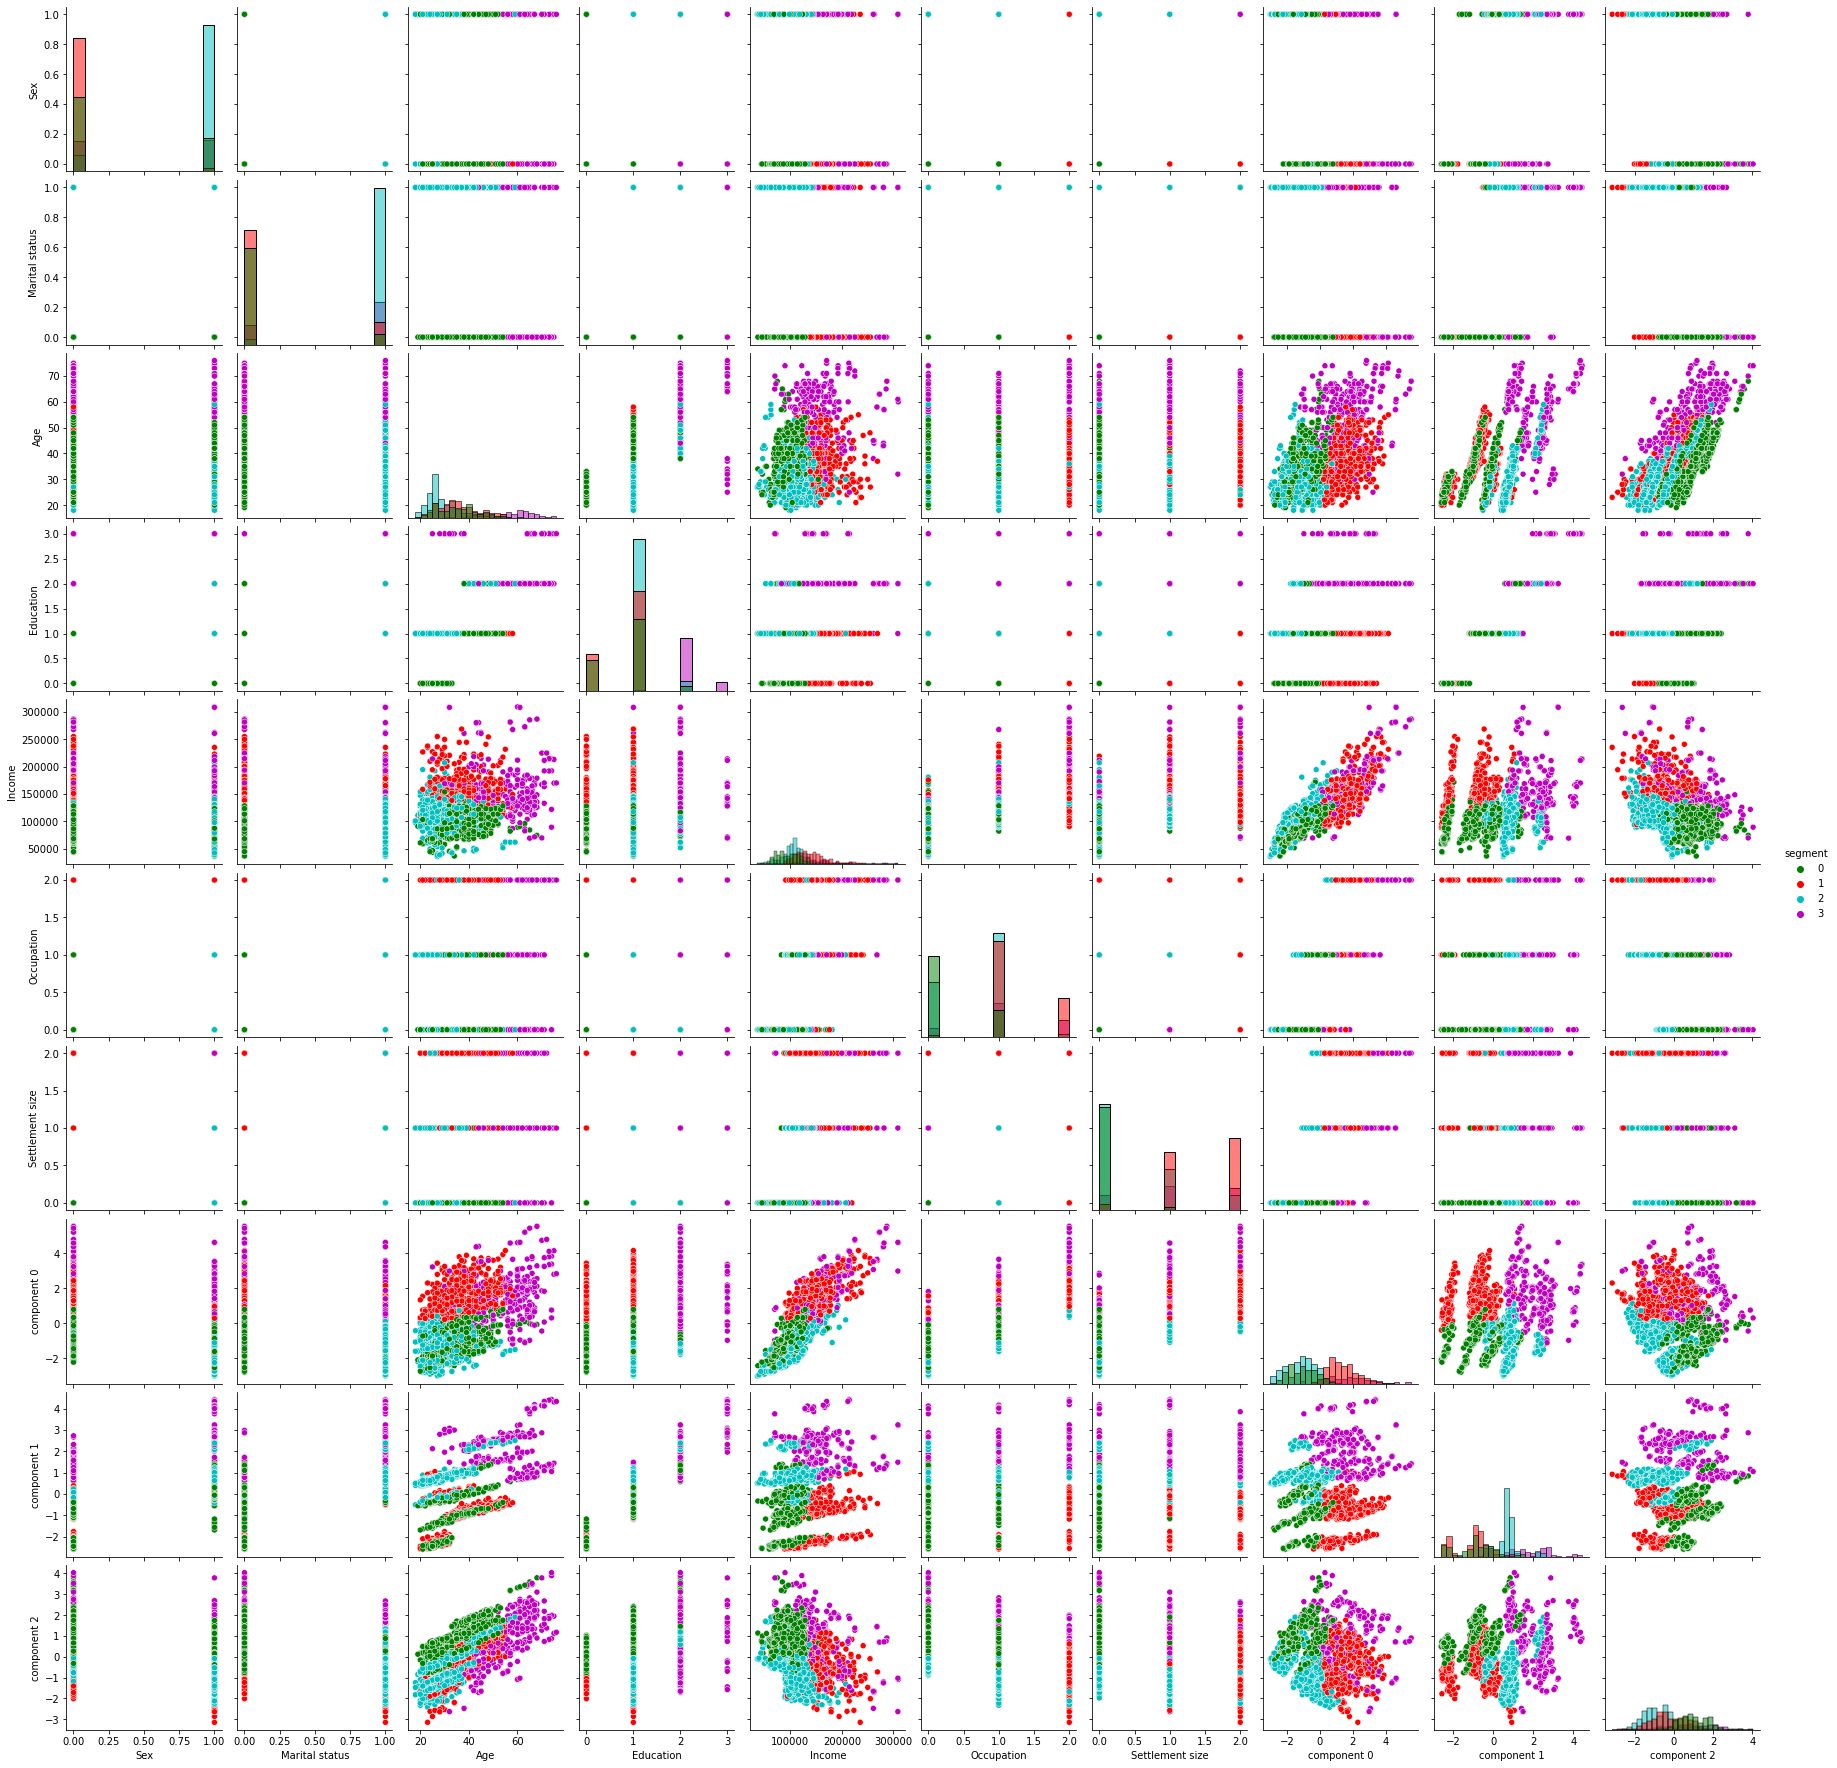

In [53]:
sns.pairplot(pca_scores_k,hue="segment",diag_kind="hist",palette=['g','r','c','m'])
plt.show()

Based on the above scatter plots, we can see that the segments are better seperated,and the overap is far less

# Data Export(Saving Models)

In [56]:
pickle.dump(scaler,open('scaler.pickle','wb'))
pickle.dump(pca,open('pca.pickle','wb'))
pickle.dump(kmeans_pca,open('kmeans_pca.pickle','wb'))